# Finding best markets to advertise in

In this project I assume to be working for an an e-learning company that offers courses on programming. Most of the courses are on web and mobile development, but the company also cover many other domains, like data science, game development, etc. I want to promote the product and would like to invest some money in advertisement. The goal in is to find out the two best markets to advertise the product in.

Good candidate for analysis is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of the analysis.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv")
df.shape

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(18175, 136)

In [2]:
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dtypes

Age                       float64
AttendedBootcamp          float64
BootcampFinish            float64
BootcampLoanYesNo         float64
BootcampName               object
BootcampRecommend         float64
ChildrenNumber            float64
CityPopulation             object
CodeEventConferences      float64
CodeEventDjangoGirls      float64
CodeEventFCC              float64
CodeEventGameJam          float64
CodeEventGirlDev          float64
CodeEventHackathons       float64
CodeEventMeetup           float64
CodeEventNodeSchool       float64
CodeEventNone             float64
CodeEventOther             object
CodeEventRailsBridge      float64
CodeEventRailsGirls       float64
CodeEventStartUpWknd      float64
CodeEventWkdBootcamps     float64
CodeEventWomenCode        float64
CodeEventWorkshops        float64
CommuteTime                object
CountryCitizen             object
CountryLive                object
EmploymentField            object
EmploymentFieldOther       object
EmploymentStat

Key questions:
- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

In [4]:
import matplotlib.pyplot as plt
interests=pd.DataFrame(round(df.JobRoleInterest.value_counts()/
                             df.JobRoleInterest.notnull().sum()*100,3))
interests

,JobRoleInterest
Full-Stack Web Developer,11.771
Front-End Web Developer,6.436
Data Scientist,2.174
Back-End Web Developer,2.031
Mobile Developer,1.673
Game Developer,1.630
Information Security,1.316
"Full-Stack Web Developer, Front-End Web Developer",0.915
"Front-End Web Developer, Full-Stack Web Developer",0.801
Product Manager,0.787


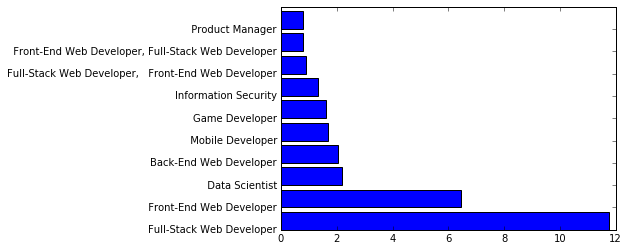

In [5]:
#plot top choices

x=interests.index.tolist()[:10]
x_pos = [i for i, _ in enumerate(x)]

%matplotlib inline
plt.barh(x_pos, interests.iloc[:10,0])
plt.yticks(x_pos, x)
plt.show()

The top learning catergories are web developers and data scientist.

Now that I found out that the sample has the right categories of people for the purpose, I can begin analyzing it. Let's start with finding out where these new coders are located, and what are the densities (how many coderes there are) for each location.

The data set provides information about the location of each participant at a country level. The CountryCitizen variable describes the country of origin for each participant, and the CountryLive variable describes what country each participants lives in (which may be different than the origin country).

For the analysis, I'll work with the CountryLive variable because I am interested where people actually live at the moment when running the ads.  

Because the data set provides information at a country level, I can think of each country as an individual market. This means I can frame the goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If the ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B

In [6]:
df=df[df.JobRoleInterest.notnull()].copy()
len(df)

6992

In [7]:
country=pd.DataFrame(round(df.CountryLive.value_counts()/
                             df.CountryLive.notnull().sum()*100,3))
country.head(10)

,CountryLive
United States of America,45.700
India,7.722
United Kingdom,4.607
Canada,3.802
Poland,1.916
Brazil,1.887
Germany,1.828
Australia,1.638
Russia,1.492
Ukraine,1.302


Based on the results the two top markets to advertise in are likely USA and India based on potential market size as derived from the frequency table. Yet, I need to understand how much money potential customers would spend on the product. The company's product sells for $59/month. Let's see how much money the users would be willing to spend:

In [8]:
df["spend_per_month"]=df.MoneyForLearning/df.MonthsProgramming.replace(0,1)
df=df[df.spend_per_month.notnull()].copy()
df=df[df.spend_per_month!=0].copy()

In [9]:
grouped = df.groupby("CountryLive").mean()

In [10]:
spend = grouped.spend_per_month.reset_index()

In [11]:
spend[spend.CountryLive=="United States of America"]

,CountryLive,spend_per_month
102,United States of America,413.043929


In [12]:
spend[spend.CountryLive=="India"]

,CountryLive,spend_per_month
39,India,311.202759


In [13]:
spend[spend.CountryLive=="United Kingdom"]

,CountryLive,spend_per_month
101,United Kingdom,92.730727


In [14]:
spend[spend.CountryLive=="Canada"]

,CountryLive,spend_per_month
14,Canada,238.970444


Considerting GPD for the listed countries, it appears curious that people in the UK would look to spend less money than people in India on the education. Perhaps looking for outliers may provide more information.

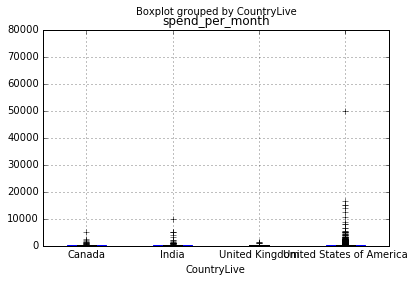

In [28]:
# df.CountryLive
four_countries=df[df.CountryLive.isin(["United States of America","India","United Kingdom","Canada"])]
four_countries.boxplot(by="CountryLive", column="spend_per_month")
plt.show()

In [57]:
#remove outliers

In [81]:
def mean_per_country(country):
    '''Removes outliers and yields mean'''
    q75, q25 = np.percentile(df[df.CountryLive==country].spend_per_month, [75 ,25])
    c=df[df.CountryLive==country]
    c=c[c.spend_per_month>=(1.5*59)]
#     c=c[c.spend_per_month<(1.5*q75)]
    pop=len(c)
    mean=c.spend_per_month.mean()
    print("Mean spend per month (only above $59 price per month in {} is ".format(country)+str(round(mean,2))+
          " and the potential number of the customers is at least {}, ".format(pop)+
         "yielding total market value of ${}.\n".format(pop*59))


In [82]:
countries=["United States of America","India","United Kingdom","Canada"]
for countr in countries:
    mean_per_country(countr)

Mean spend per month (only above $59 price per month in United States of America is 1196.18 and the potential number of the customers is at least 537, yielding total market value of $31683.

Mean spend per month (only above $59 price per month in India is 924.71 and the potential number of the customers is at least 65, yielding total market value of $3835.

Mean spend per month (only above $59 price per month in United Kingdom is 351.18 and the potential number of the customers is at least 29, yielding total market value of $1711.

Mean spend per month (only above $59 price per month in Canada is 794.15 and the potential number of the customers is at least 32, yielding total market value of $1888.



Based on reexamined results the two best countries to advertise in are the United States and India.